<a href="https://colab.research.google.com/github/Unfeir/DS/blob/main/lesson_5_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
# iris

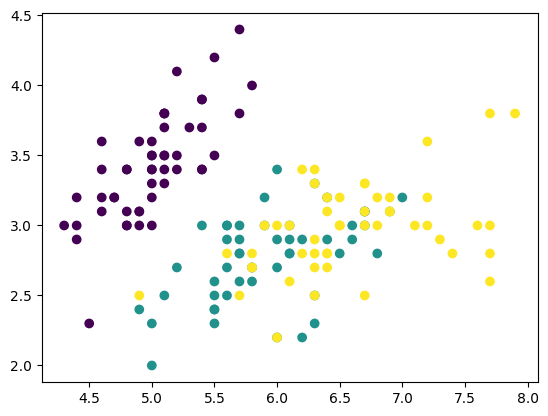

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y) #c - color

In [ ]:
C = 1 #що важливіше для можделі ширина лінії чи штраф за помилку

svc_linear = SVC(kernel='linear', C=C).fit(X,y)
svc_rbf = SVC(kernel='rbf', C=C).fit(X,y)  #colocol
svc_rbf_g = SVC(kernel='rbf', C=C, gamma=1).fit(X,y)  #colocol
svc_poly = SVC(kernel='poly', degree=5, C=C).fit(X,y)

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# xx, yy.ravel()

In [ ]:
# np.c_[xx.ravel() , yy.ravel()]

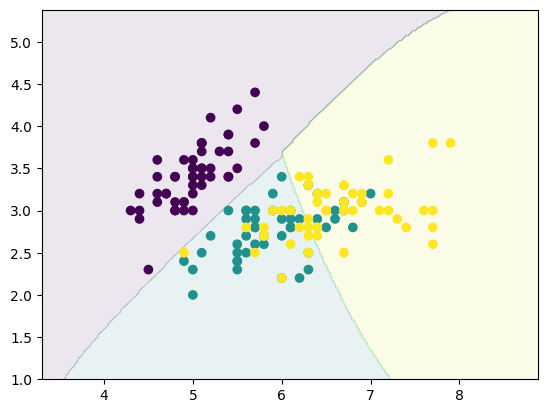

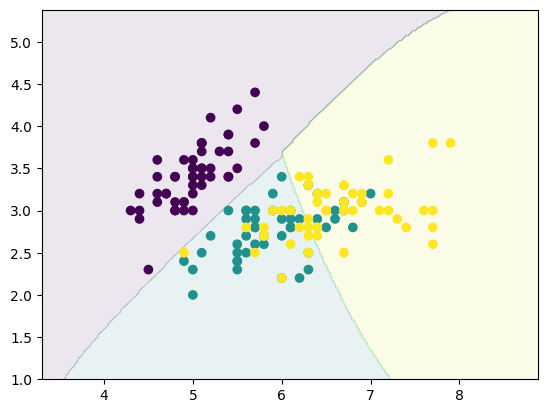

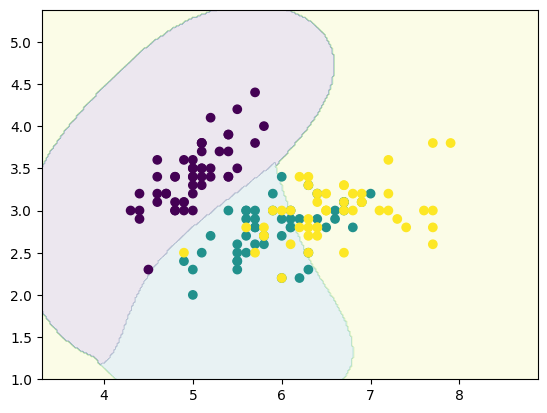

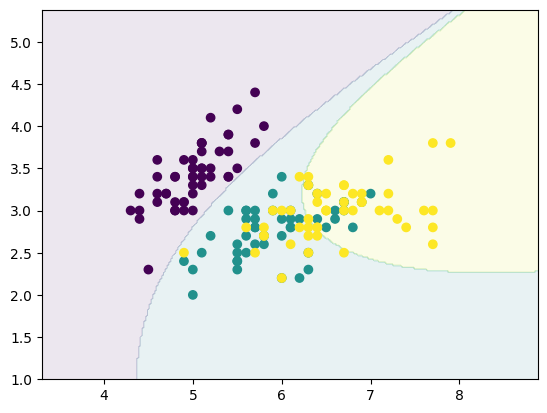

In [ ]:
for clf in (svc_linear, svc_rbf, svc_rbf_g, svc_poly):
  h = clf.predict(np.c_[xx.ravel() , yy.ravel()])
  # print(h.shape)
  h = h.reshape(xx.shape)
  # print(h.shape)
  # print(h)
  plt.contourf(xx, yy, h, alpha=0.1)
  plt.scatter(X[:, 0], X[:, 1], c=y) #c - color
  plt.show()

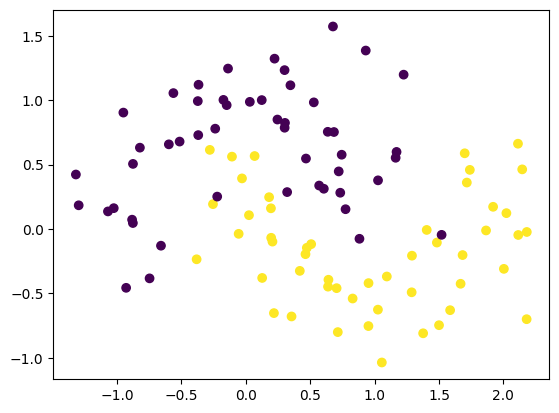

In [ ]:
X, y = datasets.make_moons(noise = 0.3, random_state=0)
# X, y
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
C = 1000 #що важливіше для можделі ширина лінії чи штраф за помилку

svc_linear = SVC(kernel='linear', C=C).fit(X,y)
svc_rbf = SVC(kernel='rbf', C=C).fit(X,y)  #colocol
svc_rbf_g = SVC(kernel='rbf', C=C, gamma=1).fit(X,y)  #colocol
svc_poly = SVC(kernel='poly', degree=5, C=C).fit(X,y)

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

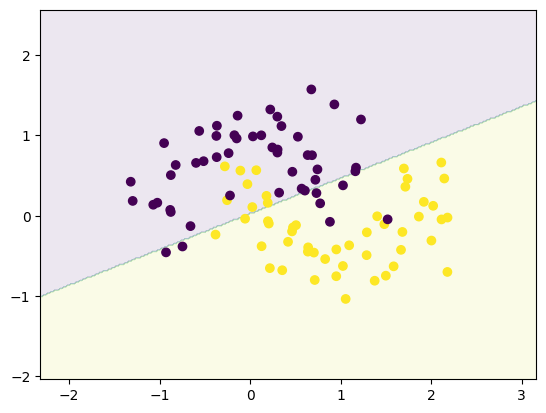

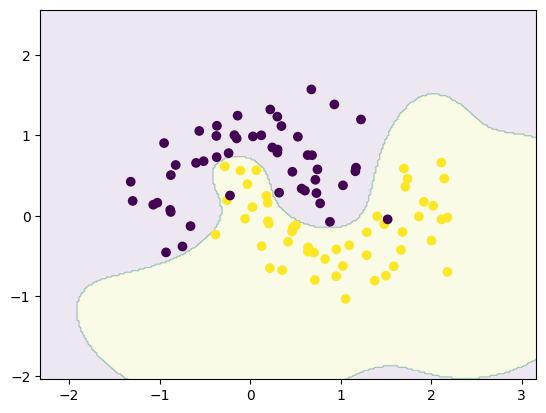

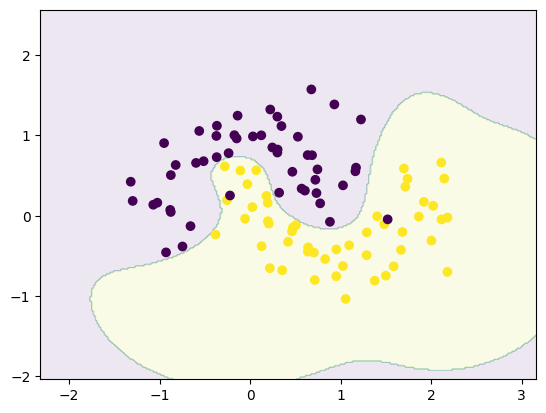

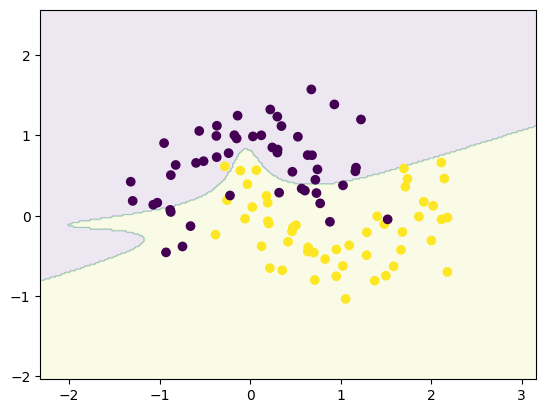

In [ ]:
for clf in (svc_linear, svc_rbf, svc_rbf_g, svc_poly):
  h = clf.predict(np.c_[xx.ravel() , yy.ravel()])
  # print(h.shape)
  h = h.reshape(xx.shape)
  # print(h.shape)
  # print(h)
  plt.contourf(xx, yy, h, alpha=0.1)
  plt.scatter(X[:, 0], X[:, 1], c=y) #c - color
  plt.show()

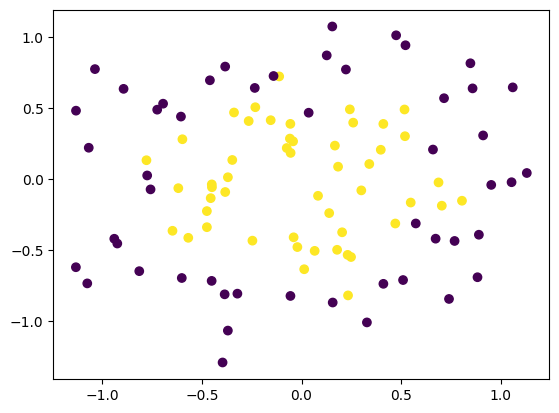

In [ ]:
X, y = datasets.make_circles(noise = 0.2, factor=0.5, random_state=1)
# X, y
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
C = 1 #що важливіше для можделі ширина лінії чи штраф за помилку

svc_linear = SVC(kernel='linear', C=C).fit(X,y)
svc_rbf = SVC(kernel='rbf', C=C).fit(X,y)  #colocol
svc_rbf_g = SVC(kernel='rbf', C=C, gamma=1).fit(X,y)  #colocol
svc_poly = SVC(kernel='poly', degree=2, C=C).fit(X,y)

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

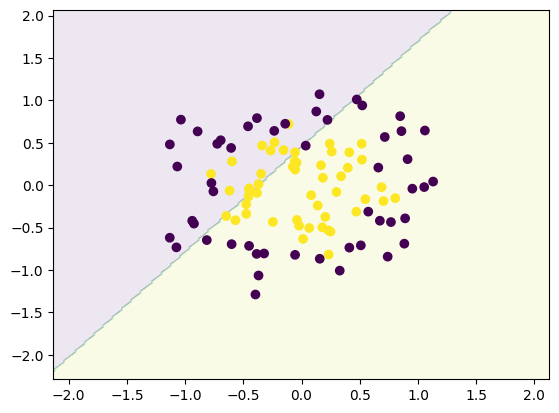

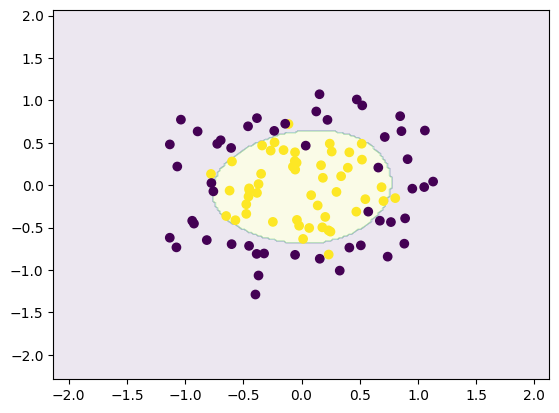

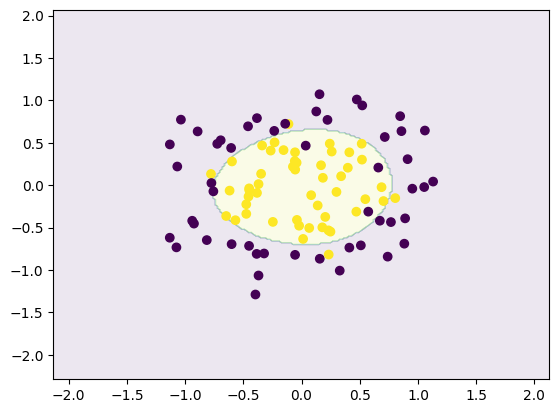

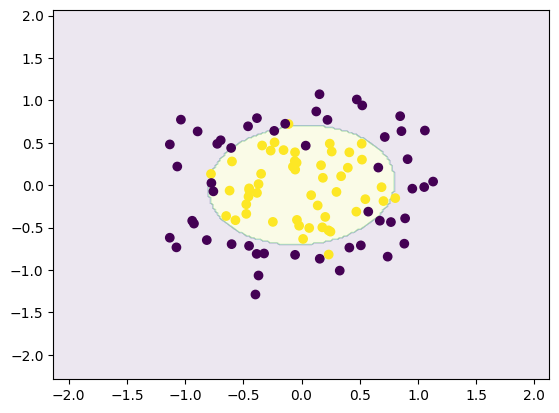

In [ ]:
for clf in (svc_linear, svc_rbf, svc_rbf_g, svc_poly):
  h = clf.predict(np.c_[xx.ravel() , yy.ravel()])
  # print(h.shape)
  h = h.reshape(xx.shape)
  # print(h.shape)
  # print(h)
  plt.contourf(xx, yy, h, alpha=0.1)
  plt.scatter(X[:, 0], X[:, 1], c=y) #c - color
  plt.show()

# вибірки

In [ ]:
X, y = datasets.make_circles(noise = 0.2, factor=0.5, random_state=1)
X.shape, y.shape


((100, 2), (100,))

In [ ]:
#навчальна, тестова, валідаційна
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, shuffle=True)

# X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, shuffle=True)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape




((60, 2), (40, 2), (60,), (40,))

In [ ]:
C = 1
svc_poly = SVC(kernel='poly', degree=4, C=C, probability=True).fit(X_train, y_train)

In [ ]:
y_valid_pred = svc_poly.predict_proba(X_valid)[:, 1]
y_train_pred = svc_poly.predict_proba(X_train)[:, 1]
# y_valid_pred

In [ ]:
accuracy_score(y_train, y_train_pred >= 0.5), accuracy_score(y_valid, y_valid_pred >= 0.5)

(0.9666666666666667, 0.85)

In [ ]:
f1_score(y_train, y_train_pred >= 0.5), f1_score(y_valid, y_valid_pred >= 0.5)

(0.967741935483871, 0.8571428571428572)

In [ ]:
roc_auc_score(y_train, y_train_pred), roc_auc_score(y_valid, y_valid_pred)

(0.9922222222222222, 0.955)

In [ ]:
CC = [0.01, 0.1, 1., 10., 100.]
degrees = [1, 2, 3, 4, 5]

for C in CC:
  for degree in degrees:
    svc_poly = SVC(kernel='poly', degree=degree, C=C, probability=True).fit(X_train, y_train)

    y_train_pred = svc_poly.predict_proba(X_train)[:, 1]
    y_valid_pred = svc_poly.predict_proba(X_valid)[:, 1]

    metric_train = f1_score(y_train, y_train_pred >= 0.5)
    metric_valid = f1_score(y_valid, y_valid_pred >= 0.5)

    print(f'{C=}, {degree=}, {metric_train=:.3f}, {metric_valid=:.3f}')

C=0.01, degree=1, metric_train=0.667, metric_valid=0.667
C=0.01, degree=2, metric_train=0.000, metric_valid=0.000
C=0.01, degree=3, metric_train=0.000, metric_valid=0.000
C=0.01, degree=4, metric_train=0.698, metric_valid=0.690
C=0.01, degree=5, metric_train=0.000, metric_valid=0.000
C=0.1, degree=1, metric_train=0.182, metric_valid=0.148
C=0.1, degree=2, metric_train=0.915, metric_valid=0.821
C=0.1, degree=3, metric_train=0.122, metric_valid=0.074
C=0.1, degree=4, metric_train=0.938, metric_valid=0.800
C=0.1, degree=5, metric_train=0.000, metric_valid=0.000
C=1.0, degree=1, metric_train=0.508, metric_valid=0.585
C=1.0, degree=2, metric_train=0.951, metric_valid=0.829
C=1.0, degree=3, metric_train=0.698, metric_valid=0.755
C=1.0, degree=4, metric_train=0.968, metric_valid=0.857
C=1.0, degree=5, metric_train=0.709, metric_valid=0.776
C=10.0, degree=1, metric_train=0.559, metric_valid=0.651
C=10.0, degree=2, metric_train=0.951, metric_valid=0.829
C=10.0, degree=3, metric_train=0.554, met

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
svc_poly = SVC(kernel='poly', probability=True).fit(X_train, y_train)

In [ ]:
params = {
    'C': [0.01, 0.1, 1., 10., 100.],
    'degree': [1, 2, 3, 4, 5]
}

In [ ]:
model = GridSearchCV(svc_poly, params, cv=5, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
model.best_params_

{'C': 1.0, 'degree': 4}

In [ ]:
model.best_score_

0.9375

In [ ]:
best_model = model.best_estimator_
best_model

SVC(degree=4, kernel='poly', probability=True)

In [ ]:
y_test_pred = best_model.predict_proba(X_test)[:, 1]
y_train_pred = best_model.predict_proba(X_train)[:, 1]


f1_score(y_train, y_train_pred >= 0.5), f1_score(y_test, y_test_pred >= 0.5)

(0.945054945054945, 0.7499999999999999)